# Notebook SAE 202

## Partie II


In [3]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc
import soundfile as sf
import time
import threading as th


In [2]:
%matplotlib inline

### Reception

In [4]:
# Création du signal modulant
fp = 10000
te = 1/fs
f0 = 10e3
time = np.arange(0, len(data)/fs, te)

AM_modulant = np.sin(2*np.pi*f0*time)

# Modulation du signal en AM


NameError: name 'data' is not defined

In [19]:
fs = 100000
fc = 400
nyquist = fs / 2
fnc = fc / nyquist
order = 8
b, a = sc.butter(order, fnc, btype="low", analog=False)
zi = sc.lfilter_zi(b, a)

def callback(indata, outdata, frames, time, status):
    global zi
    signal = indata[:, 0]
    te = 1 / fs
    time = np.arange(0, len(signal) * te, te)  # Adjust time array length

    f0 = 10e3
    AM_modulant = np.sin(2 * np.pi * f0 * time)
    signalDM = signal * AM_modulant
    
    
    signalF, zi = sc.lfilter(b, a, signalDM, zi=zi)
    
    # Ensure the output data has the same shape as the input data
    outdata[:, 0] = signalF
    #print(signalDM)


stream = sd.Stream(samplerate=fs, callback=callback)
try:
    with stream:
        print("#" * 80)
        print("press Return to exit")
        print("#" * 80)
        input()
except KeyboardInterrupt:
    exit('')

################################################################################
press Return to exit
################################################################################


Démarrage du stream
Réception du chunk numéro 0 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 1 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 2 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 3 dont le premier éléments vaut [0.]
Réception du chunk numéro 4 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 5 dont le premier éléments vaut [0.]
Réception du chunk numéro 6 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 7 dont le premier éléments vaut [3.0517578e-05]
Réception du chunk numéro 8 dont le premier éléments vaut [3.0517578e-05]
Réception du chunk numéro 9 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 10 dont le premier éléments vaut [0.]
Réception du chunk numéro 11 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 12 dont le premier éléments vaut [-9.1552734e-05]
Réception du chunk numéro 13 dont le pre

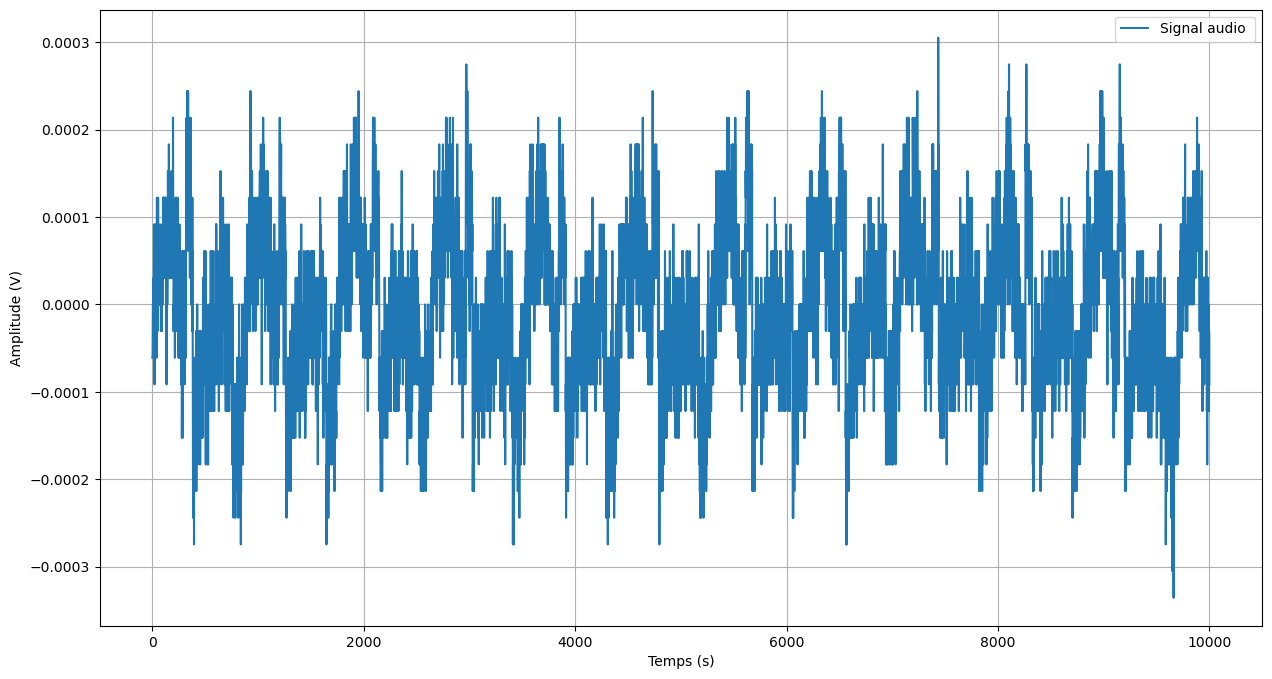

In [4]:
#print(sd.query_devices())

nombre_blocs = 0
signal = 0



def print_number(indata, frames, time, status):
    global nombre_blocs
    print(f"Réception du chunk numéro {nombre_blocs} dont le premier éléments vaut {indata[0]}")
    nombre_blocs += 1
    global signal
    signal = indata
stream = sd.InputStream(callback=print_number, blocksize=10000, channels=1)
print("Démarrage du stream")
stream.start()
time.sleep(30)
stream.stop()
print("FIn du stream")
print(f"{nombre_blocs} bloc ont été reçu")
sd.play(signal, samplerate=10000)
print(signal)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(signal, label="Signal audio ")
#ax[0].semilogx(f_tranche, fft_mono_dbm, linewidth = 2)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("Amplitude (V)")
#ax[0].set_xlim(10, 10.01)
ax.legend(loc="upper right")
ax.grid(True)


### Emission

In [5]:
print(sd.query_devices())

   0 Mappeur de sons Microsoft - Input, MME (2 in, 0 out)
>  1 Microphone (USB Audio Device), MME (1 in, 0 out)
   2 Microphone (Conexant ISST Audio, MME (2 in, 0 out)
   3 Mappeur de sons Microsoft - Output, MME (0 in, 2 out)
<  4 Haut-parleur (Conexant ISST Aud, MME (0 in, 6 out)
   5 Haut-parleurs (USB Audio Device, MME (0 in, 2 out)
   6 Réseau de microphones (Conexant ISST Audio capture), Windows WDM-KS (2 in, 0 out)
   7 Mixage stéréo (Conexant ISST Audio capture), Windows WDM-KS (2 in, 0 out)
   8 Output 1 (Conexant ISST Audio output), Windows WDM-KS (0 in, 2 out)
   9 Output 2 (Conexant ISST Audio output), Windows WDM-KS (0 in, 6 out)
  10 Input (Conexant ISST Audio output), Windows WDM-KS (2 in, 0 out)
  11 Headphones (Conexant ISST Audio headphone), Windows WDM-KS (0 in, 2 out)
  12 Casque (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Redmi Buds 4)), Windows WDM-KS (0 in, 1 out)
  13 Casque (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Redmi Buds 4)), Windows 

In [6]:
event = th.Event()

try:
    data, fs = sf.read('NR4.wav', always_2d=True)
    current_frame = 0

    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)

        chunksize = min(len(data) - current_frame, frames )
        audio = data[current_frame:current_frame + chunksize]
        outdata[:] = audio
        if chunksize < frames:
            outdata[chunksize] = 0
            raise sd.CallbackStop()
        current_frame += chunksize

    stream = sd.OutputStream(samplerate = fs, callback=callback, finished_callback=event.set)

    with stream :
        event.wait()

except KeyboardInterrupt:
    exit('\nInterrupted by  user')
    


Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x000001F7DDFB4EA0>:
Traceback (most recent call last):
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 862, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 2687, in _wrap_callback
    callback(*args)
  File "C:\Users\Clement\AppData\Local\Temp\ipykernel_19440\2035060037.py", line 14, in callback
ValueError: could not broadcast input array from shape (2048,1) into shape (2576,6)


**Transmission d'un signal modulé**

In [8]:
# Création du signal modulant
fp = 10000
te = 1/fs
f0 = 10e3
time = np.arange(0, len(data)/fs, te)

AM_modulant = np.sin(2*np.pi*f0*time)

# Modulation du signal en AM






In [12]:
event = th.Event()

try:
    data, fs = sf.read('NR4.wav', always_2d=True)
    current_frame = 0
    modulated_signal = AM_modulant * data[:, 0]
    
    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)

        chunksize = min(len(modulated_signal) - current_frame, frames )
        audio = modulated_signal[current_frame:current_frame + chunksize]
        outdata[:, 0] = audio
        if chunksize < frames:
            outdata[chunksize] = 0
            raise sd.CallbackStop()
        current_frame += chunksize

    stream = sd.OutputStream(samplerate = fs, callback=callback, finished_callback=event.set)

    with stream :
        event.wait()

except KeyboardInterrupt:
    exit('\nInterrupted by  user')
    

Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x0000017C154EDB20>:
Traceback (most recent call last):
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 862, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 2687, in _wrap_callback
    callback(*args)
  File "C:\Users\Clement\AppData\Local\Temp\ipykernel_9324\1951650648.py", line 15, in callback
ValueError: could not broadcast input array from shape (2048,) into shape (2576,)


![Screenshot_6.png](attachment:Screenshot_6.png)

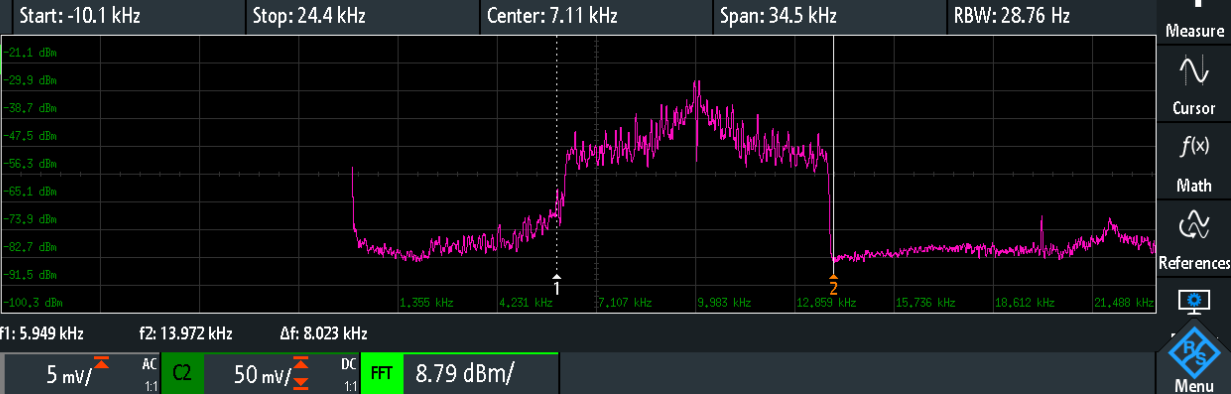